# Recognize text in images
In this project, we are going to build a neural network that can recognize text in images. We will use the MNIST dataset, which consists of grayscale handwritten digits. Each image is 28x28 pixels.

#Part I: Download the MNIST dataset

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


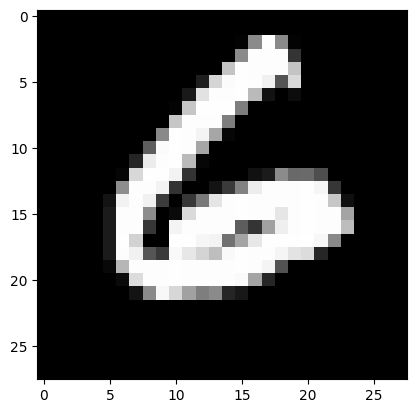

In [2]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch import nn

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/',
                          download=True, train=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

import matplotlib.pyplot as plt
plt.imshow(images[3].numpy().squeeze(), 
cmap='Greys_r')


# Part II: Build a neural network
To better recognize text in images comparing with the example in the lecture notes, we have to build a new neural network according to the following instructions.

Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a log-softmax activation. You can use the `nn.ReLU` module or the `F.relu` function for ReLU activation. Note: In practice, we usually use log-softmax output instead of softmax output.

Demo:
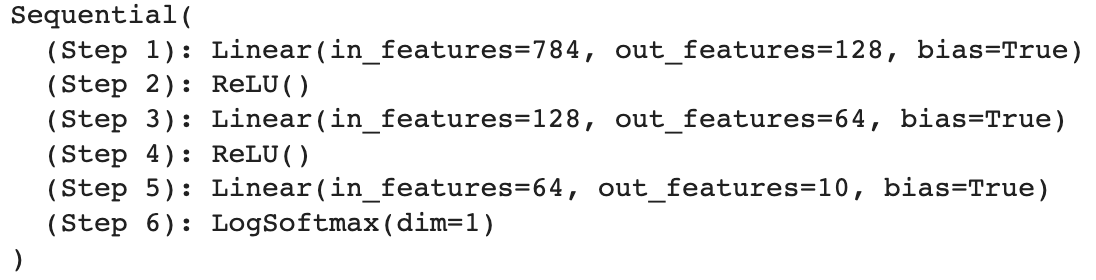

In [3]:
input_size = 784
hidden_sizes1 = 128
hidden_sizes2 = 64
output_size = 10

from collections import OrderedDict
model = nn.Sequential(OrderedDict([
    ('Step 1', nn.Linear(input_size, hidden_sizes1)),
    ('Step 2', nn.ReLU()),
    ('Step 3', nn.Linear(hidden_sizes1, hidden_sizes2)),
    ('Step 4', nn.ReLU()),
    ('Step 5', nn.Linear(hidden_sizes2, output_size)),
    ('Step 6', nn.LogSoftmax(dim=1))
]))
model

Sequential(
  (Step 1): Linear(in_features=784, out_features=128, bias=True)
  (Step 2): ReLU()
  (Step 3): Linear(in_features=128, out_features=64, bias=True)
  (Step 4): ReLU()
  (Step 5): Linear(in_features=64, out_features=10, bias=True)
  (Step 6): LogSoftmax(dim=1)
)

# Part III: Train the neural network
Implement training for our network. If you implement it correctly, you should see the training loss drop with each epoch.

In [4]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)
epochs = 10

for e in range(epochs):
    # Clear the total loss
    running_loss = 0
    # This time we consider all the images
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        # Clear the gradients
        # This should be done because gradients are accumulated
        optimizer.zero_grad()
        # Feedforward -> backpropagation -> update weights by the optimizer
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        # Calculate the total loss
        running_loss += loss.item()
    else:
        # Show the total loss in each epoch
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8057977938448697
Training loss: 0.7825376799365859
Training loss: 0.5108085563346776
Training loss: 0.42808873393833
Training loss: 0.38723201338034957
Training loss: 0.3617735400891253
Training loss: 0.3434985681796379
Training loss: 0.32889362191086385
Training loss: 0.3174658007681497
Training loss: 0.307608335272971


# Part IV: Prediction
Show that your model can accurately predict the number in the image.

tensor([[3.0848e-02, 3.6203e-04, 5.5564e-02, 7.2409e-04, 1.2653e-04, 3.5148e-02,
         6.3314e-01, 5.7170e-07, 2.4381e-01, 2.7416e-04]])


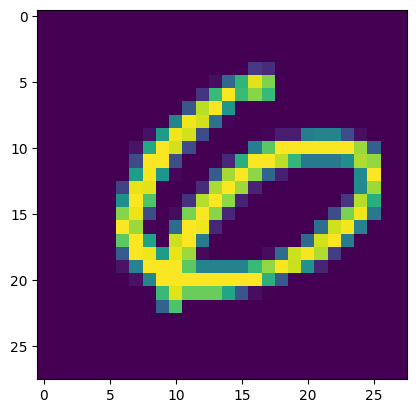

In [16]:
import matplotlib.pyplot as plt
images, labels = next(iter(trainloader))
img = images[1].view(1, 784)

with torch.no_grad():
    logits = model(img)
# Print the probabilities 
print(torch.exp(logits))
# Show the image we selected
plt.imshow(img.view(1, 28, 28).squeeze())
